In [1234]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Loading Data

### Training Data

In [1235]:
df_train = pd.read_csv('../Titanic---Predict-Survival/train.csv')
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [1236]:
df_train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [1237]:
df_train.shape

(891, 12)

### Testing Data

In [1238]:
df_test = pd.read_csv('../Titanic---Predict-Survival/test.csv')
df_test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [1239]:
df_test.describe()

PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200

In [1240]:
df_test.shape

(418, 11)

## Concatenate Training And Test

In [1241]:
df_concat = pd.concat([df_train, df_test])
df_concat.head()

PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [1242]:
#reset index
df_concat = df_concat.reset_index()

After reseting the index, data frame have the new column named "index" which contains the original indices and we can remove it

In [1243]:
df_concat

index  PassengerId  Survived  Pclass  \
0         0            1       0.0       3   
1         1            2       1.0       1   
2         2            3       1.0       3   
3         3            4       1.0       1   
4         4            5       0.0       3   
...     ...          ...       ...     ...   
1304    413         1305       NaN       3   
1305    414         1306       NaN       1   
1306    415         1307       NaN       3   
1307    416         1308       NaN       3   
1308    417         1309       NaN       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                 ...     ...   ...    ...   
1304                                 Spector, Mr. Woolf    male   NaN      0   
1305                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
1306                       Saether, Mr. Simon Sivertsen    male  38.5      0   
1307                                Ware, Mr. Frederick    male   NaN      0   
1308                           Peter, Master. Michael J    male   NaN      1   

      Parch              Ticket      Fare Cabin Embarked  
0         0           A/5 21171    7.2500   NaN        S  
1         0            PC 17599   71.2833   C85        C  
2         0    STON/O2. 3101282    7.9250   NaN        S  
3         0              113803   53.1000  C123        S  
4         0              373450    8.0500   NaN        S  
...     ...                 ...       ...   ...      ...  
1304      0           A.5. 3236    8.0500   NaN        S  
1305      0            PC 17758  108.9000  C105        C  
1306      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
1307      0              359309    8.0500   NaN        S  
1308      1                2668   22.3583   NaN        C  

[1309 rows x 13 columns]

In [1244]:
# remove "index" column
df_concat.drop(['index'], axis=1, inplace=True)

In [1245]:
df_concat.shape

(1309, 12)

## Data Analysis And Visualization

### Missing Values

In [1246]:
def missingValuesCheck(DataFrame):
    #Get number of missing data points per column
    missing_values = DataFrame.isnull().sum()
    #Missing data in each feature
    data = missing_values.values.reshape(1, DataFrame.shape[1])
    #Adding percentage of missing data in each feature
    data = np.append(data.astype(int), (data / DataFrame.shape[0]) * 100, axis=0)
    #Get columns
    cols = DataFrame.columns.values
    #Showing table
    table = pd.DataFrame(data=data, columns=cols)
    table.rename(index={0:'No. of Missing Values', 1:'% of Missing Values'}, inplace=True)
    display(table)
    
    #The total missing values
    total_missing_values = missing_values.sum()
    
    #The percentage of data that is missing
    total_cells = np.prod(DataFrame.shape)
    missing_percentage = total_missing_values / total_cells
    print("---------------------------------------------")
    print("The percentage of total missing values of the data set: {:.2f}%".format(missing_percentage * 100))

In [1247]:
# We checking missing values in merged dataset
missingValuesCheck(df_concat.drop(['Survived'], axis=1))

PassengerId  Pclass  Name  Sex         Age  SibSp  \
No. of Missing Values          0.0     0.0   0.0  0.0  263.000000    0.0   
% of Missing Values            0.0     0.0   0.0  0.0   20.091673    0.0   

                       Parch  Ticket      Fare        Cabin  Embarked  
No. of Missing Values    0.0     0.0  1.000000  1014.000000  2.000000  
% of Missing Values      0.0     0.0  0.076394    77.463713  0.152788

---------------------------------------------
The percentage of total missing values of the data set: 8.89%


After checking missing values in merge dataset (the combination between training and testing datasets). We can see that the missing values in some features, about 263 missing values (approximately 20%) in "Age" feature, 1 in "Fare" feature (nearly 0.07%), 1014 in "Cabin" feature (roughly 77%) and 2 in "Embarked" feature (roughly 0.15%)

We can find the solution to fill in the missing values in "Age" feature because the percentage of missing values in this feature is about 20%, but for "Cabin" feature, the missing values account for 77% and it is impractical to fill in all of them (cause the "Cabin" feature has 77% of missing values, so it can not provide meaning information). The suitable solution to handle missing values in "Cabin" feature is dropping this column. 

### Categorical Variables Distribution

Using training dataset for visualization

In [1248]:
# A function displaying values on top of the bars
def show_values(plot):
    for ax in plot.axes.ravel():
        # add annotations
        for c in ax.containers:
            # custom label calculates percent and add an empty string so 0 value bars don't have a number
            labels = [f'{w:0.5f}' if (w := v.get_height()) > 0 else '' for v in c]
            ax.bar_label(c, labels=labels, label_type='edge', fontsize=8, rotation=0, padding=2)
        ax.margins(y=0.2)

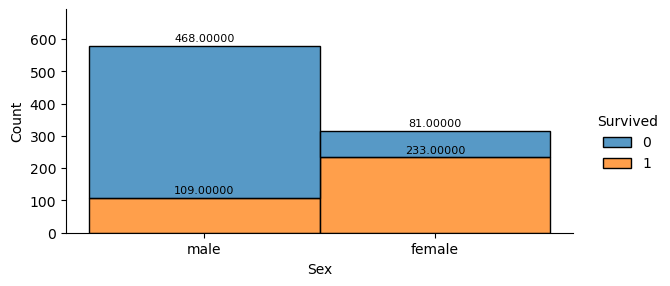

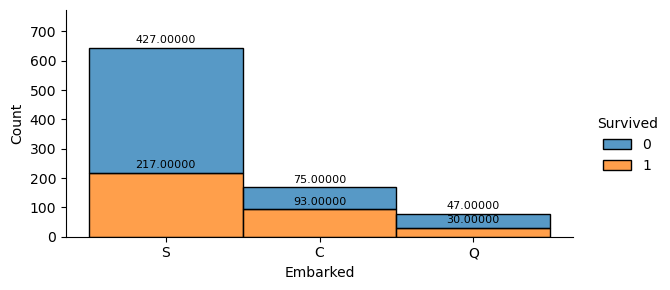

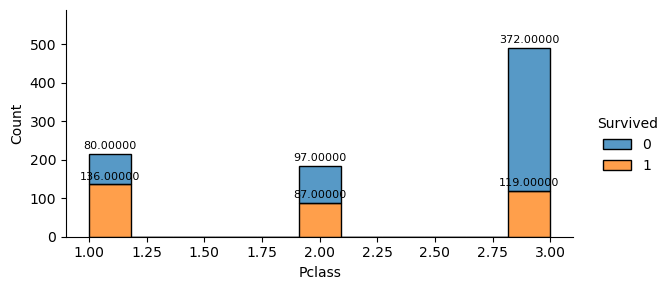

In [1249]:
displot_gender = sns.displot(data=df_train[['Sex', 'Survived']], x='Sex', hue='Survived', multiple='stack', height=3, aspect=2)
show_values(displot_gender)

displot_embarked = sns.displot(data=df_train[['Embarked', 'Survived']], x='Embarked', hue='Survived', multiple='stack', height=3, aspect=2)
show_values(displot_embarked)

displot_pclass = sns.displot(data=df_train[['Pclass', 'Survived']], x='Pclass', hue='Survived', multiple='stack', height=3, aspect=2)
show_values(displot_pclass)
plt.show()

Based on three plots above, we can see that:

1. The first histogram is about the gender of passengers. Female passengers had a better chance of survival than male passengers
2. The second histogram is about the embarkation of passengers in three ports (C: Cherbourg, Q: Queenstown, S: Southampton). The number of passengers in Southampton was higher than the rest of 2 ports and it is interesting that the survival rate of passengers in Cherbourg was higher than other ports.
3. The third histogram is about the class of passengers (number 1 represents for Upper Class, 2 for Middle Class and 3 for Lower Class). If passengers were from Upper Class, their survival rate was higher than the passengers from Middle Class or Lower Class 

### Numerical Variables Distribution

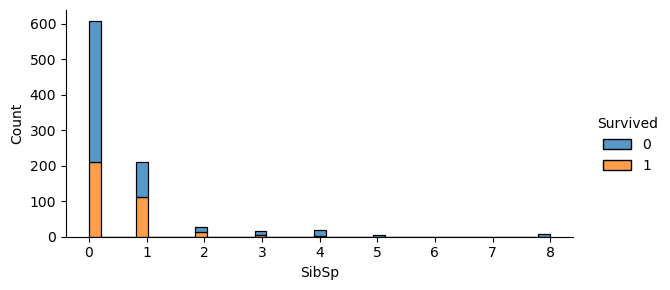

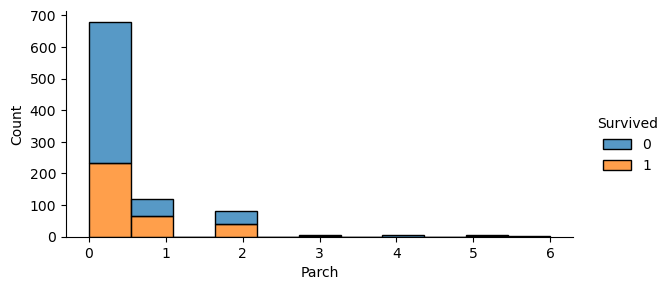

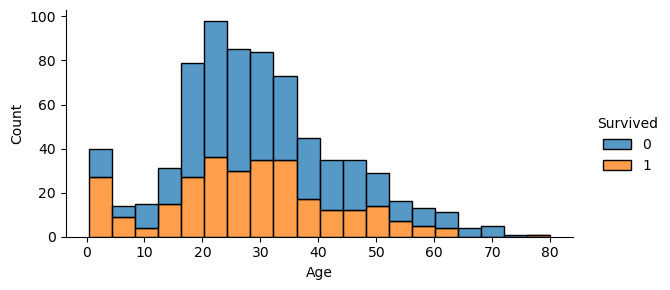

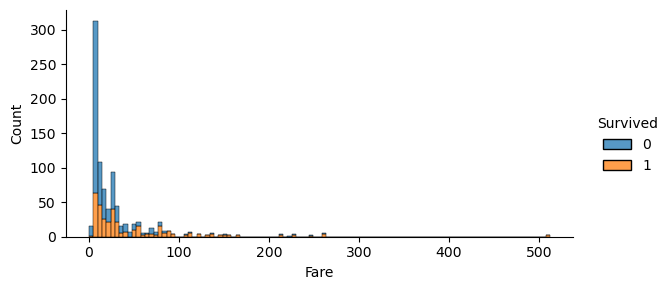

In [1250]:
displot_sibSp = sns.displot(data=df_train[['SibSp', 'Survived']], x='SibSp', hue='Survived', multiple='stack', height=3, aspect=2)
displot_sibSp

displot_parch = sns.displot(data=df_train[['Parch', 'Survived']], x='Parch', hue='Survived', multiple='stack', height=3, aspect=2)
displot_parch

displot_age = sns.displot(data=df_train[['Age', 'Survived']], x='Age', hue='Survived', multiple='stack', height=3, aspect=2)
displot_age

displot_fare = sns.displot(data=df_train[['Fare', 'Survived']], x='Fare', hue='Survived', multiple='stack', height=3, aspect=2)
displot_fare
plt.show()

#### Boxplot

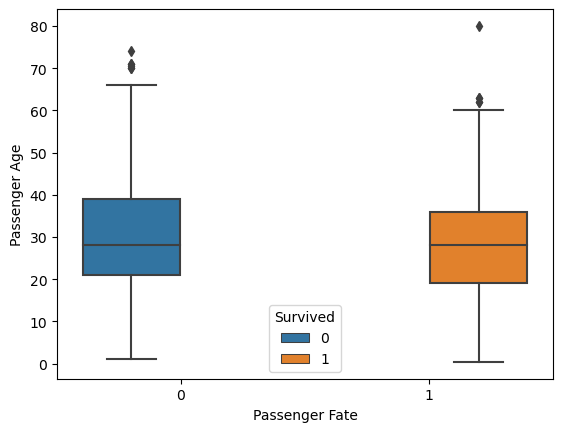

In [1251]:
sns.boxplot(data=df_train[['Age', 'Survived']], x='Survived', y='Age', hue='Survived')
plt.xlabel('Passenger Fate')
plt.ylabel('Passenger Age')
plt.show()

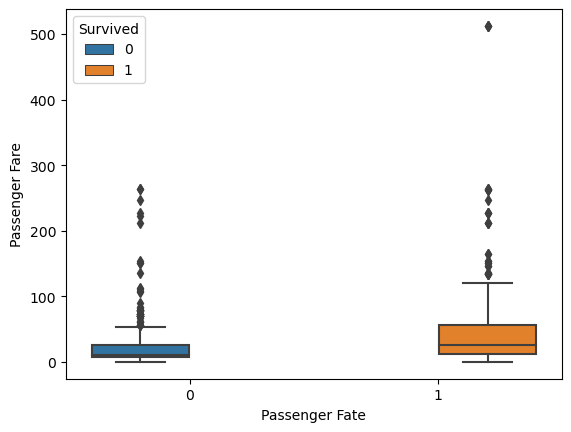

In [1252]:
sns.boxplot(data=df_train[['Fare', 'Survived']], x='Survived', y='Fare', hue='Survived')
plt.xlabel('Passenger Fate')
plt.ylabel('Passenger Fare')
plt.show()

Thehistograms and box plots above can give us information:

1. The first two histograms are about the family size. It is interesting that the less people a passenger travelled with, the higher chance to survived (travelled with 1 person or 2 people)
2. Look at the histogram of Passenger's age, we can see that it is quite similar for different passenger's fate. However we know that when the titanic sank, there was a rule which was carried out, "women and children first". This is a very important information, so we will keep "Age" variable
3. The box plot for "Fare" show that survived people paid more than deceased people. Nevertheless, we can see that there are some outliers that were the people who paid as high as 500 dollars for the ticket and this kind of ticket might be the group ticket (Family members or friends were likely to buy this kind of ticket)

=> Based on three points above, we will create two new features, Family Size and Group Ticket (we )

## Handling Missing Values

### Dealing With Missing Values in "Cabin" Variable

In [1253]:
df_concat.drop('Cabin', axis=1, inplace=True)

### Dealing With Missing Values in "Age" Variable

In [1254]:
df_concat.describe()

PassengerId    Survived       Pclass          Age        SibSp  \
count  1309.000000  891.000000  1309.000000  1046.000000  1309.000000   
mean    655.000000    0.383838     2.294882    29.881138     0.498854   
std     378.020061    0.486592     0.837836    14.413493     1.041658   
min       1.000000    0.000000     1.000000     0.170000     0.000000   
25%     328.000000    0.000000     2.000000    21.000000     0.000000   
50%     655.000000    0.000000     3.000000    28.000000     0.000000   
75%     982.000000    1.000000     3.000000    39.000000     1.000000   
max    1309.000000    1.000000     3.000000    80.000000     8.000000   

             Parch         Fare  
count  1309.000000  1308.000000  
mean      0.385027    33.295479  
std       0.865560    51.758668  
min       0.000000     0.000000  
25%       0.000000     7.895800  
50%       0.000000    14.454200  
75%       0.000000    31.275000  
max       9.000000   512.329200

- Look at a table above, we can see the distribution of "Age" variable. The mean age is about 29.88, the median age is 28, min is 0.17 and max is 80

- The mean age and the median age are very close, so the easiest way would be using the median age value to replace all missing values (this solution might not be the best option here)

- In order to explore the relationship between "Age" variable and other variables, we will find more clues. The box plots below decribe the relationship between age and socio-economic status

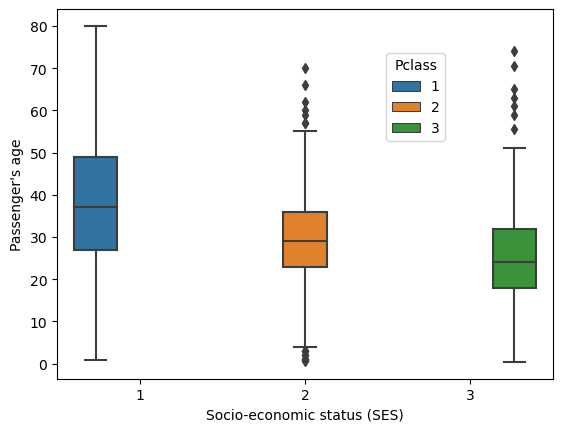

In [1255]:
pclass_age_boxplot = sns.boxplot(data=df_train[['Age', 'Pclass']], x='Pclass', y='Age', hue='Pclass')
sns.move_legend(pclass_age_boxplot, "upper left", bbox_to_anchor=(.65, .9))
plt.xlabel('Socio-economic status (SES)')
plt.ylabel("Passenger's age")
plt.show()

Based on the box plots above, we can see that the median age is increasing along with the social class, so we can use this important information to handle the missing values in "Age" variable. If the passenger's age is missing, we will look at the social class first, then use the corresponding median age of that passenger's class to replace missing value (This solution is much more accurate than just using the overall median)

But in this particular dataset, there is actually a better way to deal with the miss values in "Age" variable. Let's have a look at some of the passenger's name first.

In [1256]:
df_concat[['Name']].head()

Name
0                            Braund, Mr. Owen Harris
1  Cumings, Mrs. John Bradley (Florence Briggs Th...
2                             Heikkinen, Miss. Laina
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                           Allen, Mr. William Henry

We can see that all the passengers'names follow the same pattern: first name + title + last name, and the title can be very useful. The title can probably suggest the passenger's gender, age, and socio-economic status. It is not only for the purpose of imputing missing values, but also a part of feature engineering. Now we will extract the titles from passengers'names, and we will create a new variable called "Title" to store them in the data frame

In [1257]:
# Extract the title from name
title = df_concat.Name.str.extract(r'([A-Za-z]+)\.', expand=False)

In [1258]:
title

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
         ...  
1304        Mr
1305      Dona
1306        Mr
1307        Mr
1308    Master
Name: Name, Length: 1309, dtype: object

In [1259]:
df_concat['Title'] = title

In [1260]:
df_concat

PassengerId  Survived  Pclass  \
0               1       0.0       3   
1               2       1.0       1   
2               3       1.0       3   
3               4       1.0       1   
4               5       0.0       3   
...           ...       ...     ...   
1304         1305       NaN       3   
1305         1306       NaN       1   
1306         1307       NaN       3   
1307         1308       NaN       3   
1308         1309       NaN       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                 ...     ...   ...    ...   
1304                                 Spector, Mr. Woolf    male   NaN      0   
1305                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
1306                       Saether, Mr. Simon Sivertsen    male  38.5      0   
1307                                Ware, Mr. Frederick    male   NaN      0   
1308                           Peter, Master. Michael J    male   NaN      1   

      Parch              Ticket      Fare Embarked   Title  
0         0           A/5 21171    7.2500        S      Mr  
1         0            PC 17599   71.2833        C     Mrs  
2         0    STON/O2. 3101282    7.9250        S    Miss  
3         0              113803   53.1000        S     Mrs  
4         0              373450    8.0500        S      Mr  
...     ...                 ...       ...      ...     ...  
1304      0           A.5. 3236    8.0500        S      Mr  
1305      0            PC 17758  108.9000        C    Dona  
1306      0  SOTON/O.Q. 3101262    7.2500        S      Mr  
1307      0              359309    8.0500        S      Mr  
1308      1                2668   22.3583        C  Master  

[1309 rows x 12 columns]

After creating new variable named "Title", we will take a closer look at this variable. The data below illustrates the number of passengers with each title, including the number of missing values in "Age" variable, and it also shows us the mean and median age for each title.

In [1261]:
df_concat.groupby(['Title'])['Age'].mean()

Title
Capt        70.000000
Col         54.000000
Countess    33.000000
Don         40.000000
Dona        39.000000
Dr          43.571429
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       5.482642
Miss        21.774238
Mlle        24.000000
Mme         24.000000
Mr          32.252151
Mrs         36.994118
Ms          28.000000
Rev         41.250000
Sir         49.000000
Name: Age, dtype: float64

In [1262]:
df_concat.groupby(['Title'])['Age'].median()

Title
Capt        70.0
Col         54.5
Countess    33.0
Don         40.0
Dona        39.0
Dr          49.0
Jonkheer    38.0
Lady        48.0
Major       48.5
Master       4.0
Miss        22.0
Mlle        24.0
Mme         24.0
Mr          29.0
Mrs         35.5
Ms          28.0
Rev         41.5
Sir         49.0
Name: Age, dtype: float64

In [1263]:
df_concat.groupby(['Title'], sort=False)['Title'].count()

Title
Mr          757
Mrs         197
Miss        260
Master       61
Don           1
Rev           8
Dr            8
Mme           1
Ms            2
Major         2
Lady          1
Sir           1
Mlle          2
Col           4
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

In [1264]:
df_concat['Na_Age'] = df_concat['Age'].isnull()
df_concat.groupby(['Title'])['Na_Age'].sum()

Title
Capt          0
Col           0
Countess      0
Don           0
Dona          0
Dr            1
Jonkheer      0
Lady          0
Major         0
Master        8
Miss         50
Mlle          0
Mme           0
Mr          176
Mrs          27
Ms            1
Rev           0
Sir           0
Name: Na_Age, dtype: int64

In [1265]:
#drop Na_Age column
df_concat.drop('Na_Age', axis=1, inplace=True)

We can see that the common titles are Mr, Miss, Mrs, and Master. Some of the titles Ms, Lady, Sir,...etc can be grouped into the a group named "Others" 

In [1266]:
common_titles = ['Mr', 'Miss', 'Mrs', 'Master']
df_concat['Title'].replace(['Ms', 'Mlle', 'Mme'], 'Miss', inplace=True)
df_concat['Title'].replace(['Lady'], 'Mrs', inplace=True)
df_concat['Title'].replace(['Sir', 'Rev'], 'Mr', inplace=True)
df_concat['Title'][~df_concat['Title'].isin(common_titles)] = 'Others'

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8288\3957482790.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat['Title'][~df_concat['Title'].isin(common_titles)] = 'Others'


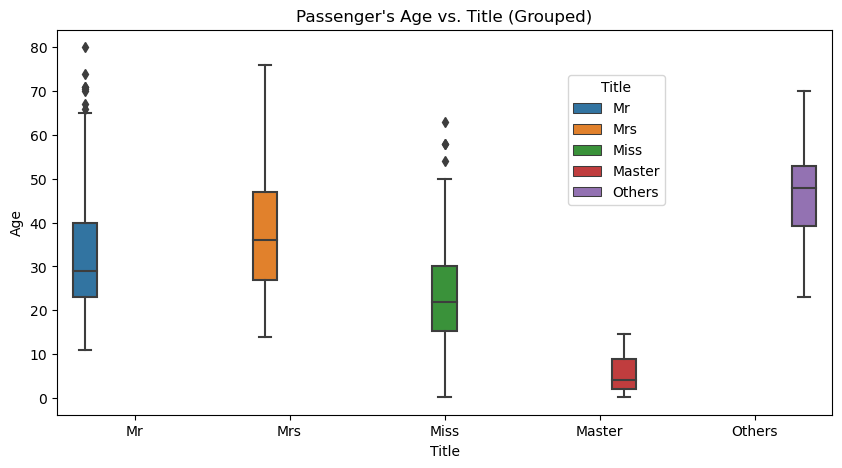

In [1267]:
plt.figure(figsize=(10, 5))
age_title_boxplot = sns.boxplot(data=df_concat, x='Title', y='Age', hue='Title')
sns.move_legend(age_title_boxplot, "upper left", bbox_to_anchor=(.65, .9))
plt.title('Passenger\'s Age vs. Title (Grouped)')
plt.show()

Now we will replace the missing values in 'Age' variable with the median age based on the 'Title'

In [1268]:
title_dict = dict()
for t in df_concat.groupby(['Title'])['Age'].all().index:
    title_dict.update({t: df_concat.groupby(['Title'])['Age'].median()[t]})

In [1269]:
title_dict

{'Master': 4.0, 'Miss': 22.0, 'Mr': 29.0, 'Mrs': 36.0, 'Others': 48.0}

In [1270]:
# replace missing values
for t in title_dict:
    df_concat['Age'][(df_concat['Age'].isnull()) & (df_concat['Title']==t)] = title_dict[t]

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8288\1100576934.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat['Age'][(df_concat['Age'].isnull()) & (df_concat['Title']==t)] = title_dict[t]


In [1271]:
missingValuesCheck(df_concat.drop(['Survived'], axis=1))

PassengerId  Pclass  Name  Sex  Age  SibSp  Parch  \
No. of Missing Values          0.0     0.0   0.0  0.0  0.0    0.0    0.0   
% of Missing Values            0.0     0.0   0.0  0.0  0.0    0.0    0.0   

                       Ticket      Fare  Embarked  Title  
No. of Missing Values     0.0  1.000000  2.000000    0.0  
% of Missing Values       0.0  0.076394  0.152788    0.0

---------------------------------------------
The percentage of total missing values of the data set: 0.02%


### Dealing With Missing Values in "Embarked" Variable

In [1272]:
df_concat['Embarked'].mode().values[0]

'S'

There are only 2 missing values in "Embarked" variable. In order to handle missing values, we can fill in empty cells with 'S' because most of the passengers are embarked from port S abbreviation for Southampton (we can find out it by using mode in statistics).

In [1273]:
df_concat['Embarked'].fillna(df_concat['Embarked'].mode().values[0], inplace=True)

In [1274]:
missingValuesCheck(df_concat.drop(['Survived'], axis=1))

PassengerId  Pclass  Name  Sex  Age  SibSp  Parch  \
No. of Missing Values          0.0     0.0   0.0  0.0  0.0    0.0    0.0   
% of Missing Values            0.0     0.0   0.0  0.0  0.0    0.0    0.0   

                       Ticket      Fare  Embarked  Title  
No. of Missing Values     0.0  1.000000       0.0    0.0  
% of Missing Values       0.0  0.076394       0.0    0.0

---------------------------------------------
The percentage of total missing values of the data set: 0.01%


### Dealing With Missing Values in "Fare" Variable

In [1275]:
df_concat[df_concat['Fare'] == 0]

PassengerId  Survived  Pclass                                   Name  \
179           180       0.0       3                    Leonard, Mr. Lionel   
263           264       0.0       1                  Harrison, Mr. William   
271           272       1.0       3           Tornquist, Mr. William Henry   
277           278       0.0       2            Parkes, Mr. Francis "Frank"   
302           303       0.0       3        Johnson, Mr. William Cahoone Jr   
413           414       0.0       2         Cunningham, Mr. Alfred Fleming   
466           467       0.0       2                  Campbell, Mr. William   
481           482       0.0       2       Frost, Mr. Anthony Wood "Archie"   
597           598       0.0       3                    Johnson, Mr. Alfred   
633           634       0.0       1          Parr, Mr. William Henry Marsh   
674           675       0.0       2             Watson, Mr. Ennis Hastings   
732           733       0.0       2                   Knight, Mr. Robert J   
806           807       0.0       1                 Andrews, Mr. Thomas Jr   
815           816       0.0       1                       Fry, Mr. Richard   
822           823       0.0       1        Reuchlin, Jonkheer. John George   
1157         1158       NaN       1  Chisholm, Mr. Roderick Robert Crispin   
1263         1264       NaN       1                Ismay, Mr. Joseph Bruce   

       Sex   Age  SibSp  Parch  Ticket  Fare Embarked   Title  
179   male  36.0      0      0    LINE   0.0        S      Mr  
263   male  40.0      0      0  112059   0.0        S      Mr  
271   male  25.0      0      0    LINE   0.0        S      Mr  
277   male  29.0      0      0  239853   0.0        S      Mr  
302   male  19.0      0      0    LINE   0.0        S      Mr  
413   male  29.0      0      0  239853   0.0        S      Mr  
466   male  29.0      0      0  239853   0.0        S      Mr  
481   male  29.0      0      0  239854   0.0        S      Mr  
597   male  49.0      0      0    LINE   0.0        S      Mr  
633   male  29.0      0      0  112052   0.0        S      Mr  
674   male  29.0      0      0  239856   0.0        S      Mr  
732   male  29.0      0      0  239855   0.0        S      Mr  
806   male  39.0      0      0  112050   0.0        S      Mr  
815   male  29.0      0      0  112058   0.0        S      Mr  
822   male  38.0      0      0   19972   0.0        S  Others  
1157  male  29.0      0      0  112051   0.0        S      Mr  
1263  male  49.0      0      0  112058   0.0        S      Mr

The "Fare" variable is a litle bit tricky. Although there is only 1 missing value, we can see from the summary statistics that there are some 0 fares in the table above. This kind of ticket might be the ticket for baby passengers, they are just too young to be charged. But dive deep into the details, it turned out differently. We can clearly see that on in the table above, these people with 0 fares are not babies and it might be some kind of error. We can handle these zeros the same as missing values.

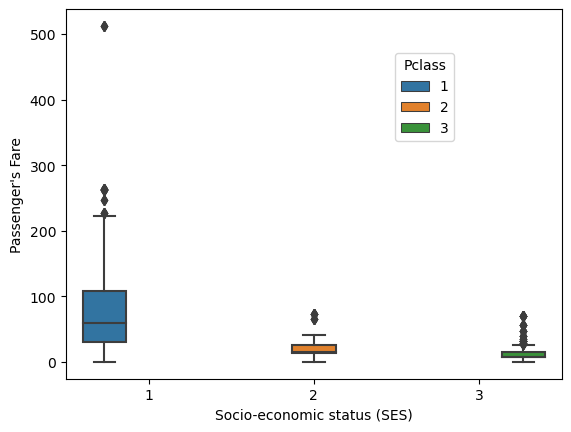

In [1276]:
pclass_age_boxplot = sns.boxplot(data=df_concat[['Fare', 'Pclass']], x='Pclass', y='Fare', hue='Pclass')
sns.move_legend(pclass_age_boxplot, "upper left", bbox_to_anchor=(.65, .9))
plt.xlabel('Socio-economic status (SES)')
plt.ylabel("Passenger's Fare")
plt.show()

In [1277]:
# median values of fare for 3 socio-economic status
df_concat.groupby(['Pclass'])['Fare'].median()

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

- We can see that the median values of fare are 60 dollars, 15.045 dollars and 8.05 dollars for Upper, middle and lower class respectively.
- We will use these values to replace missing values in "Fare" variable for each passenger's class.

In [1278]:
# store median fare for each passenger's class in dict
pclass_fare_list = dict()
for i in df_concat.groupby(['Pclass']).all().index:
    pclass_fare_list.update({i: df_concat.groupby(['Pclass'])['Fare'].median()[i]})

In [1279]:
pclass_fare_list

{1: 60.0, 2: 15.0458, 3: 8.05}

In [1280]:
# replace missing values
for i in pclass_fare_list:
    df_concat['Fare'][(df_concat['Fare'].isnull()) & (df_concat['Pclass']==i)] = pclass_fare_list[i]

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8288\155688934.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat['Fare'][(df_concat['Fare'].isnull()) & (df_concat['Pclass']==i)] = pclass_fare_list[i]


In [1281]:
missingValuesCheck(df_concat.drop(['Survived'], axis=1))

PassengerId  Pclass  Name  Sex  Age  SibSp  Parch  \
No. of Missing Values          0.0     0.0   0.0  0.0  0.0    0.0    0.0   
% of Missing Values            0.0     0.0   0.0  0.0  0.0    0.0    0.0   

                       Ticket  Fare  Embarked  Title  
No. of Missing Values     0.0   0.0       0.0    0.0  
% of Missing Values       0.0   0.0       0.0    0.0

---------------------------------------------
The percentage of total missing values of the data set: 0.00%


After the imputation, there is no missing values left in "Fare" variable 

## Feature Engineering

- Now, we will create some new features based on the exploratory analysis.
- there are 3 new variable named "famSize", "group", and "wom_chd"

### Family Size

We will create a new feature which is relatively easy to build. Family size of a passenger is equal to the number of siblings/spouses plus number of parents/children plus one that is the passenger.

From the distribution of passenger's family size below, we can see that the median family size for those who survived is 2 which will be used in the next part of our feature engineering.

In [1282]:
# Create family size variable
df_concat['FamSize'] = df_concat['SibSp'] + df_concat['Parch'] + 1

In [1283]:
df_concat

PassengerId  Survived  Pclass  \
0               1       0.0       3   
1               2       1.0       1   
2               3       1.0       3   
3               4       1.0       1   
4               5       0.0       3   
...           ...       ...     ...   
1304         1305       NaN       3   
1305         1306       NaN       1   
1306         1307       NaN       3   
1307         1308       NaN       3   
1308         1309       NaN       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                 ...     ...   ...    ...   
1304                                 Spector, Mr. Woolf    male  29.0      0   
1305                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
1306                       Saether, Mr. Simon Sivertsen    male  38.5      0   
1307                                Ware, Mr. Frederick    male  29.0      0   
1308                           Peter, Master. Michael J    male   4.0      1   

      Parch              Ticket      Fare Embarked   Title  FamSize  
0         0           A/5 21171    7.2500        S      Mr        2  
1         0            PC 17599   71.2833        C     Mrs        2  
2         0    STON/O2. 3101282    7.9250        S    Miss        1  
3         0              113803   53.1000        S     Mrs        2  
4         0              373450    8.0500        S      Mr        1  
...     ...                 ...       ...      ...     ...      ...  
1304      0           A.5. 3236    8.0500        S      Mr        1  
1305      0            PC 17758  108.9000        C  Others        1  
1306      0  SOTON/O.Q. 3101262    7.2500        S      Mr        1  
1307      0              359309    8.0500        S      Mr        1  
1308      1                2668   22.3583        C  Master        3  

[1309 rows x 13 columns]

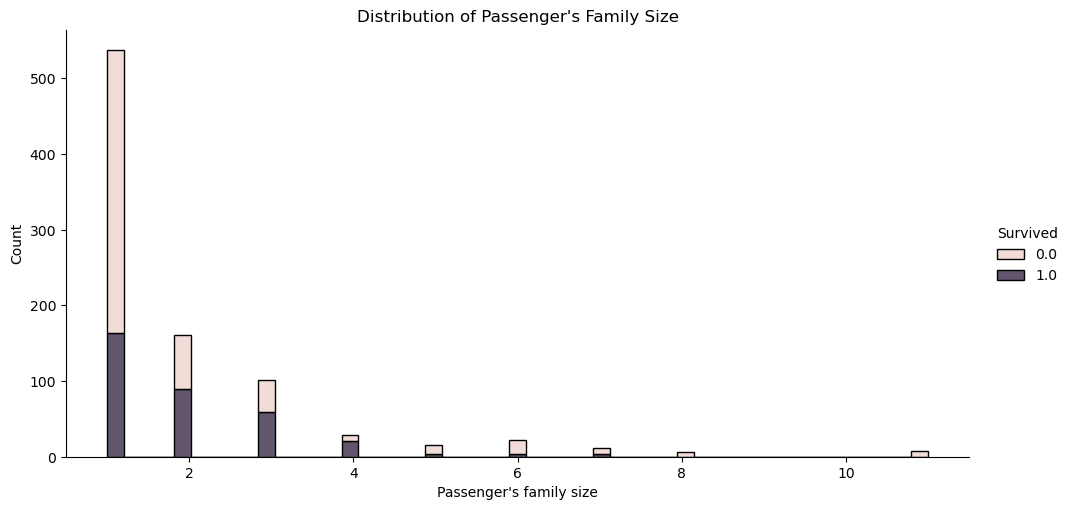

In [1284]:
sns.displot(data=df_concat[['FamSize', 'Survived']], x='FamSize', hue='Survived', multiple='stack', height=5, aspect=2)
plt.xlabel("Passenger's family size")
plt.title("Distribution of Passenger's Family Size")
plt.show()

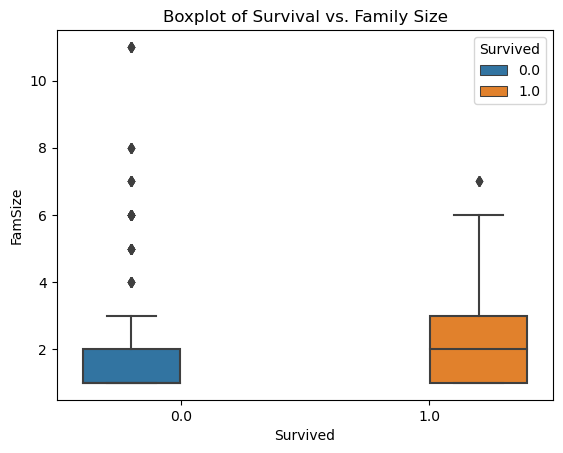

In [1285]:
sns.boxplot(data=df_concat, x='Survived', y='FamSize', hue='Survived')
plt.title('Boxplot of Survival vs. Family Size')
plt.show()

### Group Ticket

It is interesting that in "Ticket" variable, the total number of passengers is 1309, however there are only 929 unique tickets.
it indicates that there are a lot of people who shared the same ticket. We will call it Group Ticket, and in this part, we will create a new feature named "Group" to represent these shared tickets.

in the previous feature engineering part, we have already mentioned that the median family size for the survived is 2. In this new variable, we will calculate the number of passengers with each ticket, and if the number is greater than 2, we will assign "Group" variable a value 1, and 0 vice versa.

In [1286]:
ticket_group = df_concat.groupby(['Ticket'])['Ticket'].count()

In [1287]:
df_concat['Group'] = 0

In [1288]:
df_concat

PassengerId  Survived  Pclass  \
0               1       0.0       3   
1               2       1.0       1   
2               3       1.0       3   
3               4       1.0       1   
4               5       0.0       3   
...           ...       ...     ...   
1304         1305       NaN       3   
1305         1306       NaN       1   
1306         1307       NaN       3   
1307         1308       NaN       3   
1308         1309       NaN       3   

                                                   Name     Sex   Age  SibSp  \
0                               Braund, Mr. Owen Harris    male  22.0      1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                                Heikkinen, Miss. Laina  female  26.0      0   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                              Allen, Mr. William Henry    male  35.0      0   
...                                                 ...     ...   ...    ...   
1304                                 Spector, Mr. Woolf    male  29.0      0   
1305                       Oliva y Ocana, Dona. Fermina  female  39.0      0   
1306                       Saether, Mr. Simon Sivertsen    male  38.5      0   
1307                                Ware, Mr. Frederick    male  29.0      0   
1308                           Peter, Master. Michael J    male   4.0      1   

      Parch              Ticket      Fare Embarked   Title  FamSize  Group  
0         0           A/5 21171    7.2500        S      Mr        2      0  
1         0            PC 17599   71.2833        C     Mrs        2      0  
2         0    STON/O2. 3101282    7.9250        S    Miss        1      0  
3         0              113803   53.1000        S     Mrs        2      0  
4         0              373450    8.0500        S      Mr        1      0  
...     ...                 ...       ...      ...     ...      ...    ...  
1304      0           A.5. 3236    8.0500        S      Mr        1      0  
1305      0            PC 17758  108.9000        C  Others        1      0  
1306      0  SOTON/O.Q. 3101262    7.2500        S      Mr        1      0  
1307      0              359309    8.0500        S      Mr        1      0  
1308      1                2668   22.3583        C  Master        3      0  

[1309 rows x 14 columns]

In [1289]:
for t in ticket_group.index:
    if ticket_group[t] >= 2:
        for i in df_concat[df_concat['Ticket']==t]['Group'].index:
            df_concat['Group'][i] = 1

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8288\3537125623.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat['Group'][i] = 1


It turns out about one quarter of the passengers match my "Group" criteria.

In [1290]:
group_count = df_concat.groupby(['Group'])['Group'].count().values.reshape(1, 2)
group_count = np.append(group_count, np.round(group_count / (group_count[0][0] + group_count[0][1]) * 100, decimals=2), axis=0)
table = pd.DataFrame(data=group_count, columns=['Yes', 'No'])
table.rename(index={0:'No. of Passengers', 1:'% of Passengers'}, inplace=True)
display(table)

Yes      No
No. of Passengers  713.00  596.00
% of Passengers     54.47   45.53

### Women and Children

As we have already known that women and children first rule was carried out in the incident, so in this part we will create a feature named WomChd directly related to women and children. If a passenger is either female or less than 18 years old, we will assign WomChd a value 1, and 0 vice versa.

In [1291]:
df_concat['WomChd'] = 0

In [1292]:
for i in df_concat[(df_concat['Age']<18) | (df_concat['Sex']=='female')].index:
    df_concat['WomChd'][i] = 1

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8288\4271619743.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_concat['WomChd'][i] = 1


There are nearly 40% passengers are either women or children. But we know the total survival rate is only roughly 30%. We will see how well this feature can help us predict the fate of passengers in the modeling part.

In [1293]:
womchd = df_concat.groupby('WomChd')['WomChd'].count().values.reshape(1, 2)
womchd = np.append(womchd, np.round(womchd / (womchd[0][0] + womchd[0][1]) * 100, 2), axis=0)
table = pd.DataFrame(data=womchd, columns=['Yes', 'No'])
table.rename(index={0:'No. of Passengers', 1:'% of Passengers'}, inplace=True)
display(table)

Yes      No
No. of Passengers  753.00  556.00
% of Passengers     57.52   42.48

Let's have a look at the relationship of passengers'fate and the two new variables we've just created

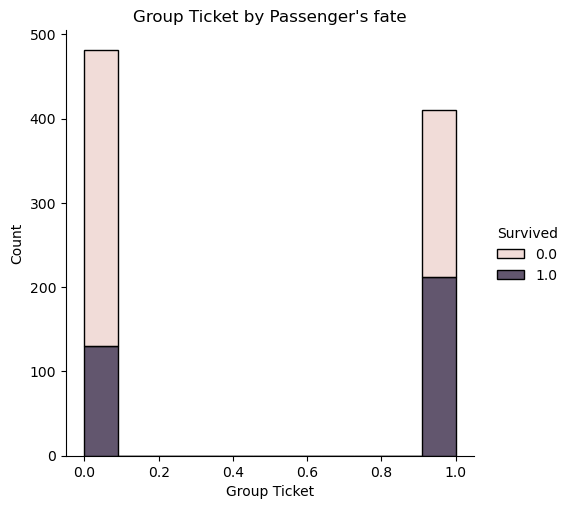

In [1294]:
sns.displot(data=df_concat, x='Group', hue='Survived', multiple='stack')
plt.xlabel('Group Ticket')
plt.title("Group Ticket by Passenger's fate")
plt.show()

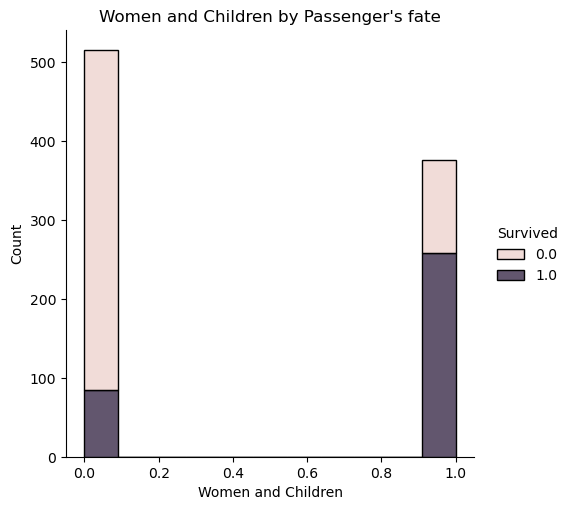

In [1295]:
sns.displot(data=df_concat, x='WomChd', hue='Survived', multiple='stack')
plt.xlabel('Women and Children')
plt.title("Women and Children by Passenger's fate")
plt.show()

It is clear that passengers taking a group ticket, or being women or children have a higher chance to survive

### Encoding Categorical Features

In [1296]:
# Remove Name and Ticket variables
df_concat.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
df_concat

Survived  Pclass     Sex   Age  SibSp  Parch      Fare Embarked   Title  \
0          0.0       3    male  22.0      1      0    7.2500        S      Mr   
1          1.0       1  female  38.0      1      0   71.2833        C     Mrs   
2          1.0       3  female  26.0      0      0    7.9250        S    Miss   
3          1.0       1  female  35.0      1      0   53.1000        S     Mrs   
4          0.0       3    male  35.0      0      0    8.0500        S      Mr   
...        ...     ...     ...   ...    ...    ...       ...      ...     ...   
1304       NaN       3    male  29.0      0      0    8.0500        S      Mr   
1305       NaN       1  female  39.0      0      0  108.9000        C  Others   
1306       NaN       3    male  38.5      0      0    7.2500        S      Mr   
1307       NaN       3    male  29.0      0      0    8.0500        S      Mr   
1308       NaN       3    male   4.0      1      1   22.3583        C  Master   

      FamSize  Group  WomChd  
0           2      0       0  
1           2      1       1  
2           1      0       1  
3           2      1       1  
4           1      0       0  
...       ...    ...     ...  
1304        1      0       0  
1305        1      1       1  
1306        1      0       0  
1307        1      0       0  
1308        3      1       1  

[1309 rows x 12 columns]

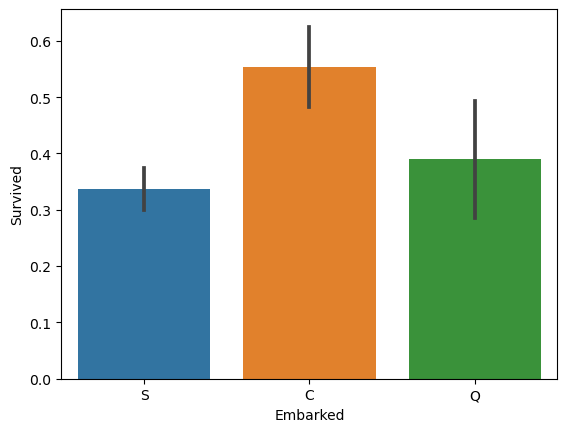

In [1297]:
sns.barplot(data=df_train, x='Embarked', y='Survived')
plt.show()

In [1298]:
df_concat['Embarked'] = df_concat['Embarked'].map({"S": 0, "Q": 1, "C": 2})

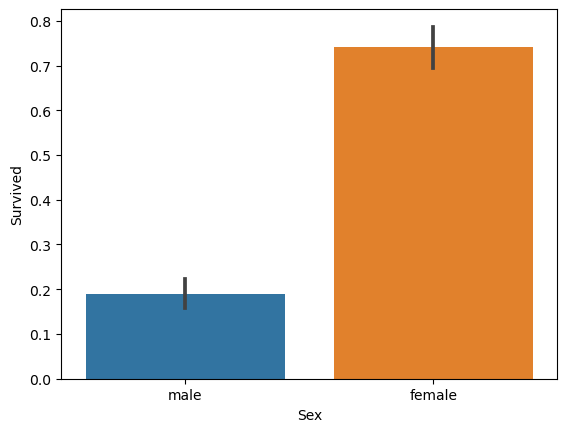

In [1299]:
sns.barplot(data=df_train, x='Sex', y='Survived')
plt.show()

In [1300]:
df_concat['Sex'] = df_concat['Sex'].map({"male": 0, "female": 1})

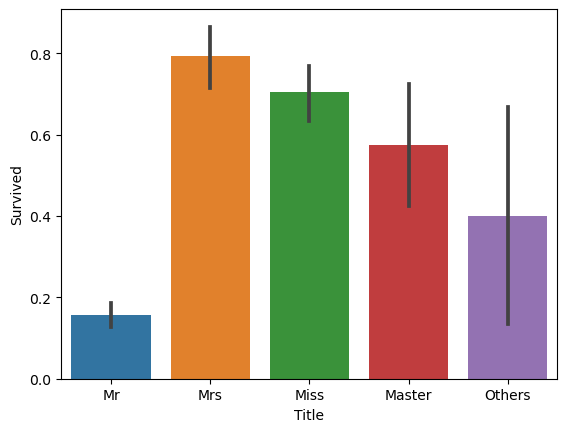

In [1301]:
sns.barplot(data=df_concat[:len(df_train)], x='Title', y='Survived')
plt.show()

In [1302]:
df_concat['Title'] = df_concat['Title'].map({"Mr": 0, "Others": 1, "Master": 2, "Miss": 3, "Mrs": 4})

In [1303]:
df_concat

Survived  Pclass  Sex   Age  SibSp  Parch      Fare  Embarked  Title  \
0          0.0       3    0  22.0      1      0    7.2500         0      0   
1          1.0       1    1  38.0      1      0   71.2833         2      4   
2          1.0       3    1  26.0      0      0    7.9250         0      3   
3          1.0       1    1  35.0      1      0   53.1000         0      4   
4          0.0       3    0  35.0      0      0    8.0500         0      0   
...        ...     ...  ...   ...    ...    ...       ...       ...    ...   
1304       NaN       3    0  29.0      0      0    8.0500         0      0   
1305       NaN       1    1  39.0      0      0  108.9000         2      1   
1306       NaN       3    0  38.5      0      0    7.2500         0      0   
1307       NaN       3    0  29.0      0      0    8.0500         0      0   
1308       NaN       3    0   4.0      1      1   22.3583         2      2   

      FamSize  Group  WomChd  
0           2      0       0  
1           2      1       1  
2           1      0       1  
3           2      1       1  
4           1      0       0  
...       ...    ...     ...  
1304        1      0       0  
1305        1      1       1  
1306        1      0       0  
1307        1      0       0  
1308        3      1       1  

[1309 rows x 12 columns]

## Modeling

After analyzing and exploring the patterns and creating new features, now we will train models to predict the fate of the passengers.

There are 3 machine learning models which are used in this project:
- Logistic Regression
- Support Vector Machine
- Random Forest
Before diving into the modeling process, we will split the dataset into 2 parts: training and testing

In [1304]:
#X = df_concat.drop(['Survived', 'FamSize', 'SibSp', 'Embarked', 'Parch', 'Group'], axis=1).values
X = df_concat.drop(['Survived'], axis=1).values
y = df_concat['Survived'].values

In [1305]:
X.shape

(1309, 11)

In [1306]:
y.shape

(1309,)

In [1307]:
# training set
X_train = X[:len(df_train)]
y_train = y[:len(df_train)]

In [1308]:
# testing set
X_test = X[len(df_train):]
y_test = y[len(df_train):]

with each method, the model is trained on the training dataset, and then be used to predict the fate of the passengers in the testing dataset.

### Feature Scaling

Feature scaling: it can make algorithms perform better when numerical input variables are scaled to a standard range.

In [1309]:
from sklearn.preprocessing import MinMaxScaler

In [1310]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [1311]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Feature Selection

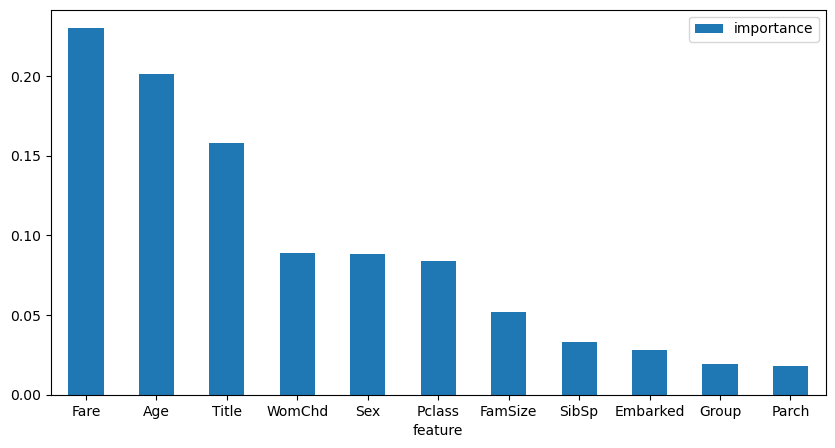

In [1312]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200, random_state=2)
model.fit(X_train,y_train)
importance = pd.DataFrame({'feature':df_concat.drop(['Survived'], axis=1).columns, 'importance': np.round(model.feature_importances_,3)})
importance = importance.sort_values('importance', ascending=False).set_index('feature')
importance.plot(kind='bar', rot=0, figsize=(10, 5))
plt.show()

### Logistic Regression With Cross-Validation

In [1313]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    ConfusionMatrixDisplay
)

In [1314]:
logistic_regression = LogisticRegression()

In [1315]:
param_grid = {
    'penalty': ["l2"],
    'solver': ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]
}

In [1316]:
grid_logistic_regression = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5, return_train_score=True, scoring='accuracy', n_jobs=-1)
grid_logistic_regression.fit(X_train, y_train)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 434, in _check_solver
    raise ValueError(
Va

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'penalty': ['l2'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             return_train_score=True, scoring='accuracy')

In [1317]:
cv_results = pd.DataFrame(grid_logistic_regression.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_penalty  \
0       0.018151      0.001596         0.000998    6.675720e-07            l2   
1       0.003391      0.000489         0.000997    8.920167e-04            l2   
2       0.016754      0.004343         0.000400    4.898664e-04            l2   
3       0.000598      0.000488         0.000000    0.000000e+00            l2   
4       0.007980      0.002601         0.000399    4.885776e-04            l2   
5       0.006779      0.001163         0.000998    7.599534e-07            l2   

      param_solver                                          params  \
0            lbfgs            {'penalty': 'l2', 'solver': 'lbfgs'}   
1        liblinear        {'penalty': 'l2', 'solver': 'liblinear'}   
2        newton-cg        {'penalty': 'l2', 'solver': 'newton-cg'}   
3  newton-cholesky  {'penalty': 'l2', 'solver': 'newton-cholesky'}   
4              sag              {'penalty': 'l2', 'solver': 'sag'}   
5             saga             {'penalty': 'l2', 'solver': 'saga'}   

   split0_test_score  split1_test_score  split2_test_score  ...  \
0           0.826816           0.820225           0.808989  ...   
1           0.826816           0.820225           0.808989  ...   
2           0.826816           0.820225           0.808989  ...   
3                NaN                NaN                NaN  ...   
4           0.826816           0.820225           0.808989  ...   
5           0.826816           0.820225           0.808989  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.820419        0.013846                1            0.831461   
1         0.820419        0.013846                1            0.831461   
2         0.820419        0.013846                1            0.831461   
3              NaN             NaN                6                 NaN   
4         0.820419        0.013846                1            0.831461   
5         0.820419        0.013846                1            0.831461   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.826087            0.830295            0.834502   
1            0.826087            0.830295            0.834502   
2            0.826087            0.830295            0.834502   
3                 NaN                 NaN                 NaN   
4            0.826087            0.830295            0.834502   
5            0.826087            0.830295            0.834502   

   split4_train_score  mean_train_score  std_train_score  
0            0.821879          0.828845         0.004406  
1            0.821879          0.828845         0.004406  
2            0.821879          0.828845         0.004406  
3                 NaN               NaN              NaN  
4            0.821879          0.828845         0.004406  
5            0.821879          0.828845         0.004406  

[6 rows x 22 columns]

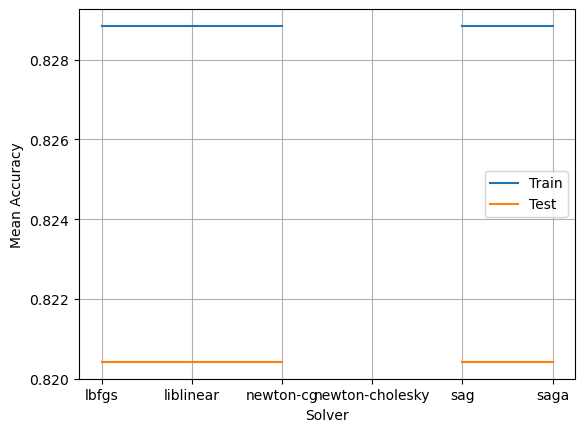

In [1318]:
plt.plot(cv_results['param_solver'], cv_results['mean_train_score'])
plt.plot(cv_results['param_solver'], cv_results['mean_test_score'])
plt.xlabel('Solver')
plt.ylabel('Mean Accuracy')
plt.legend(['Train', 'Test'])
plt.grid(True)

In [1319]:
grid_logistic_regression.best_params_

{'penalty': 'l2', 'solver': 'lbfgs'}

In [1320]:
logistic_regression = grid_logistic_regression.best_estimator_

In [1321]:
y_pred = logistic_regression.predict(X_train)
y_pred_1 = logistic_regression.predict(X_test)

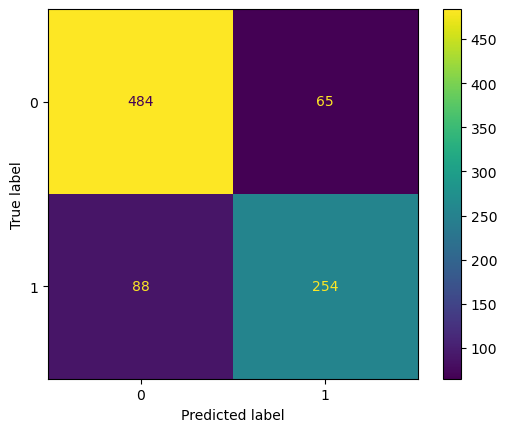

In [1322]:
cm = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_train, y_pred))
cm.plot()
plt.show()

In [1323]:
print('Precision for training: {:.2f}%'.format(precision_score(y_train, y_pred)))
print('Recall for training: {:.2f}%'.format(recall_score(y_train, y_pred)))
print('F1 for training: {:.2f}%'.format(f1_score(y_train, y_pred)))

Precision for training: 0.80%
Recall for training: 0.74%
F1 for training: 0.77%


### Support Vector Machine

In [1324]:
from sklearn.svm import SVC

In [1325]:
svm_model = SVC()

In [1326]:
param_grid = {
    'kernel': ['linear', 'rbf', 'sigmoid', 'polynomial']
}

In [1327]:
grid_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, return_train_score=True, scoring='accuracy', n_jobs=-1)
grid_svm.fit(X_train, y_train)

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 315, in _dense_fit
    ) = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'kernel': ['linear', 'rbf', 'sigmoid', 'polynomial']},
             return_train_score=True, scoring='accuracy')

In [1328]:
cv_results = pd.DataFrame(grid_svm.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_kernel  \
0       0.017153      0.001716         0.003191        0.000399       linear   
1       0.022540      0.001017         0.027327        0.016552          rbf   
2       0.024335      0.001954         0.003990        0.000893      sigmoid   
3       0.001396      0.000489         0.000000        0.000000   polynomial   

                     params  split0_test_score  split1_test_score  \
0      {'kernel': 'linear'}           0.843575           0.825843   
1         {'kernel': 'rbf'}           0.832402           0.825843   
2     {'kernel': 'sigmoid'}           0.625698           0.617978   
3  {'kernel': 'polynomial'}                NaN                NaN   

   split2_test_score  split3_test_score  ...  mean_test_score  std_test_score  \
0           0.814607           0.764045  ...         0.811412        0.026467   
1           0.825843           0.786517  ...         0.823784        0.020363   
2           0.657303           0.674157  ...         0.640870        0.021299   
3                NaN                NaN  ...              NaN             NaN   

   rank_test_score  split0_train_score  split1_train_score  \
0                2            0.825843            0.831697   
1                1            0.845506            0.840112   
2                3            0.654494            0.640954   
3                4                 NaN                 NaN   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.826087            0.817672            0.792426   
1            0.838710            0.855540            0.827489   
2            0.645161            0.628331            0.633941   
3                 NaN                 NaN                 NaN   

   mean_train_score  std_train_score  
0          0.818745         0.013899  
1          0.841471         0.009156  
2          0.640576         0.009043  
3               NaN              NaN  

[4 rows x 21 columns]

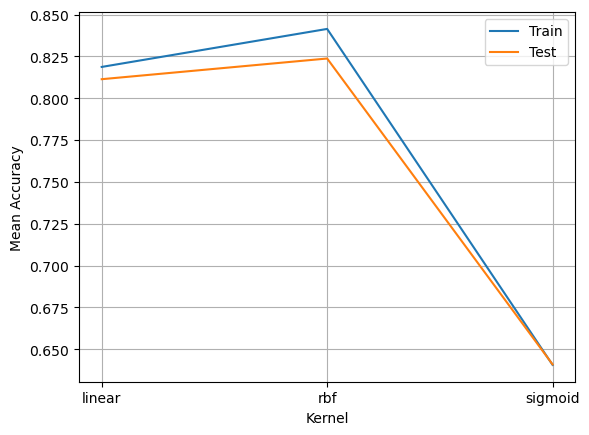

In [1329]:
plt.plot(cv_results['param_kernel'], cv_results['mean_train_score'])
plt.plot(cv_results['param_kernel'], cv_results['mean_test_score'])
plt.xlabel('Kernel')
plt.ylabel('Mean Accuracy')
plt.legend(['Train', 'Test'])
plt.grid(True)

In [1330]:
grid_svm.best_params_

{'kernel': 'rbf'}

In [1331]:
svm_model = grid_svm.best_estimator_

In [1332]:
y_pred = svm_model.predict(X_train)
y_pred_2 = svm_model.predict(X_test)

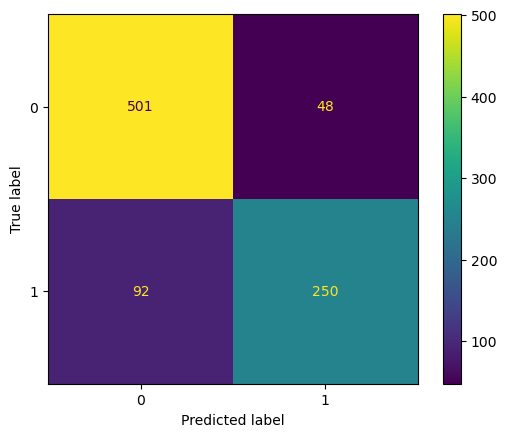

In [1333]:
cm = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_train, y_pred))
cm.plot()
plt.show()

In [1334]:
print('Precision for training: {:.2f}%'.format(precision_score(y_train, y_pred)))
print('Recall for training: {:.2f}%'.format(recall_score(y_train, y_pred)))
print('F1 for training: {:.2f}%'.format(f1_score(y_train, y_pred)))

Precision for training: 0.84%
Recall for training: 0.73%
F1 for training: 0.78%


### Random Forest

In [1335]:
from sklearn.ensemble import RandomForestClassifier

In [1336]:
rfc = RandomForestClassifier()

In [1337]:
grid_param = {
 'n_estimators': [100, 200, 300],
 'criterion':['gini', 'entropy'],
 'min_samples_split': [2, 10, 20],
 'min_samples_leaf': [1, 5],
 'bootstrap': [True, False],
}

In [1338]:
grid_rfc = GridSearchCV(estimator=rfc, param_grid=grid_param, cv=5, return_train_score=True, scoring='accuracy', n_jobs=-1)
grid_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 5],
                         'min_samples_split': [2, 10, 20],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='accuracy')

In [1339]:
cv_results = pd.DataFrame(grid_rfc.cv_results_).sort_values(by=['rank_test_score'])

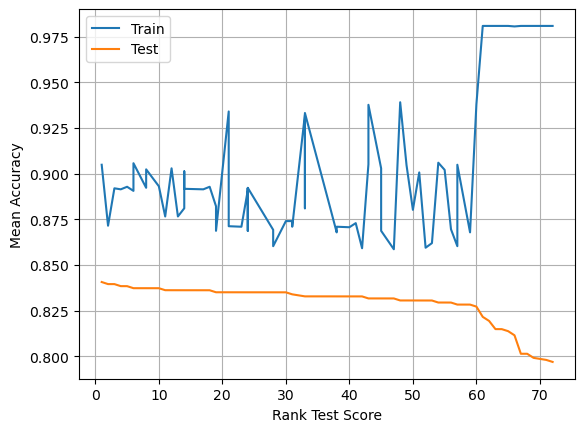

In [1340]:
plt.plot(cv_results['rank_test_score'], cv_results['mean_train_score'])
plt.plot(cv_results['rank_test_score'], cv_results['mean_test_score'])
plt.xlabel('Rank Test Score')
plt.ylabel('Mean Accuracy')
plt.legend(['Train', 'Test'])
plt.grid(True)

In [1341]:
grid_rfc.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 200}

In [1342]:
rfc = grid_rfc.best_estimator_

In [1343]:
y_pred = rfc.predict(X_train)
y_pred_3 = rfc.predict(X_test)

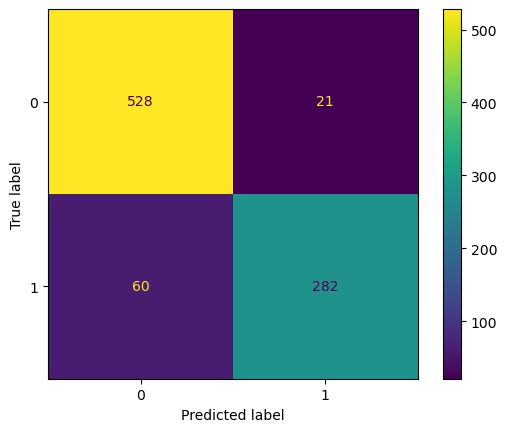

In [1344]:
cm = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_train, y_pred))
cm.plot()
plt.show()

In [1345]:
print('Precision for training: {:.2f}%'.format(precision_score(y_train, y_pred)))
print('Recall for training: {:.2f}%'.format(recall_score(y_train, y_pred)))
print('F1 for training: {:.2f}%'.format(f1_score(y_train, y_pred)))

Precision for training: 0.93%
Recall for training: 0.82%
F1 for training: 0.87%


## Export Submission

After training models and evaluate the perfomance of these models, we will choose the model which has the best performance.

Look at the measurements such as Accuracy, precision, recall, and f1-score, we can see that random forest algorithm performs quite good, so we will choose this algorithm.

In [1347]:
gender_submission = pd.read_csv('../Titanic---Predict-Survival/gender_submission.csv')
actual = gender_submission['Survived'].values

In [1348]:
print('Precision for training - Logistic Regression model: {:.2f}%'.format(precision_score(actual, y_pred_1)))
print('Recall for training - Logistic Regression model: {:.2f}%'.format(recall_score(actual, y_pred_1)))
print('F1 for training - Logistic Regression model: {:.2f}%'.format(f1_score(actual, y_pred_1)))
print('Accuracy for training - Logistic Regression model: {:.2f}%'.format(accuracy_score(actual, y_pred_1)))

Precision for training - Logistic Regression model: 0.89%
Recall for training - Logistic Regression model: 0.96%
F1 for training - Logistic Regression model: 0.92%
Accuracy for training - Logistic Regression model: 0.94%


In [1349]:
print('Precision for training - SVM model: {:.2f}%'.format(precision_score(actual, y_pred_2)))
print('Recall for training - SVM model: {:.2f}%'.format(recall_score(actual, y_pred_2)))
print('F1 for training - SVM model: {:.2f}%'.format(f1_score(actual, y_pred_2)))
print('Accuracy for training - SVM model: {:.2f}%'.format(accuracy_score(actual, y_pred_2)))

Precision for training - SVM model: 0.90%
Recall for training - SVM model: 0.93%
F1 for training - SVM model: 0.91%
Accuracy for training - SVM model: 0.94%


In [1350]:
print('Precision for training - Random Forest model: {:.2f}%'.format(precision_score(actual, y_pred_3)))
print('Recall for training - Random Forest model: {:.2f}%'.format(recall_score(actual, y_pred_3)))
print('F1 for training - Random Forest model: {:.2f}%'.format(f1_score(actual, y_pred_3)))
print('Accuracy for training - Random Forest model: {:.2f}%'.format(accuracy_score(actual, y_pred_3)))

Precision for training - Random Forest model: 0.84%
Recall for training - Random Forest model: 0.83%
F1 for training - Random Forest model: 0.83%
Accuracy for training - Random Forest model: 0.88%


In [1353]:
# Save test predictions to file
output = pd.DataFrame({'PassengerId': df_test.PassengerId.values,
                       'Survived': y_pred_1.astype(int)})
output.to_csv('submission.csv', index=False)

## Reference: 
- https://rpubs.com/jk100a/Titanic
- https://medium.com/analytics-vidhya/kaggle-titanic-survival-prediction-top-3-ea6c8dcc9b6c